# Demonstrate time series

We can start from logistic resource supply.

Maybe later, use the package of DynamicSystems to study chaos.

In [1]:
using MAT
using Plots
using LinearAlgebra
using DifferentialEquations
using Random
using Statistics
using LaTeXStrings
using TickTock
using TensorOperations

In [7]:
include("../Julia-Part/Jobarray/RCMfunction.jl")

ResConLog! (generic function with 1 method)

In [72]:
ρ = 0.0
Ns = 96
Nr = 64

sample = rand(Ns,2,Nr)
L = [[1, ρ] [0, sqrt(1-ρ^2)]]

@tensoropt sample[a,b,c] = L[b,e] * sample[a,e,c]

G = sample[:,1,:]
C = sample[:,2,:]

C = C .* (0.01 .+ 0.99*rand(Nr))'

Ss = 0.01 .+ 0.99*rand(Ns)
Rs = 0.01 .+ 0.99*rand(Nr)

δ = G * Rs
gamma = Rs.*(C'*Ss);
#g = 0.1 .+ 0.9*rand(Nr)

#K = (C' * Ss)./g + Rs;


64-element Vector{Float64}:
 14.19888675624375
  5.456030329395483
  0.8915043709773559
  0.8564901962433632
  0.5757893692857305
  4.367577693376959
  2.961195823686544
 15.646577761249903
  2.499081658572721
 12.48857273930507
  ⋮
  7.279969429827978
  0.8302798958589358
  1.689519494964457
  8.646511761658932
  8.423687504129502
  1.9415295510739348
  5.079009495279033
  4.786956772142281
  2.633318975363305

In [73]:
tspan = (0.0, 10000.0) # time for one test solution
#para = (Ns,Nr,G,C,g,K,δ)

para = (Ns,Nr,G,C,gamma,δ)

u0 = zeros(Ns+Nr)
u0[1:Ns] = Ss .* (1 .+ 1.0*(rand(Ns) .- 0.5))
u0[Ns+1:end] = Rs .* (1 .+ 1.0*(rand(Nr) .- 0.5))

prob = ODEProblem(ResCon!,u0,tspan,para)
#VCABM3() or Tsit5() or TRBDF2()
sol = solve(prob, saveat = 10, AutoVern7(Rodas4()), isoutofdomain = (u,p,t)->any(x->x < 0.0,u));

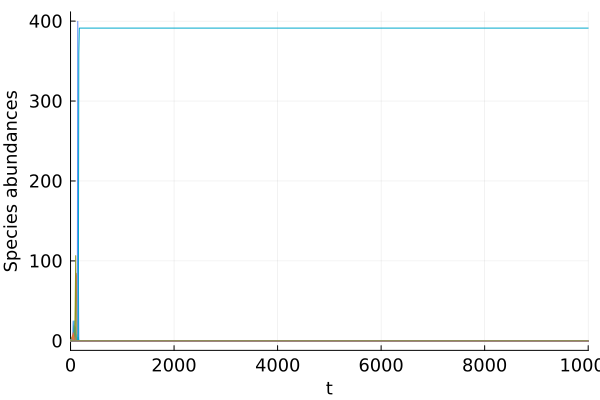

In [74]:
#pyplot()
plot(sol,idxs = 1:Ns,legend = false,
    ylabel="Species abundances",
    xtickfont=font(12),
    ytickfont=font(12),
    guidefont=font(12),
    legendfont=font(12))

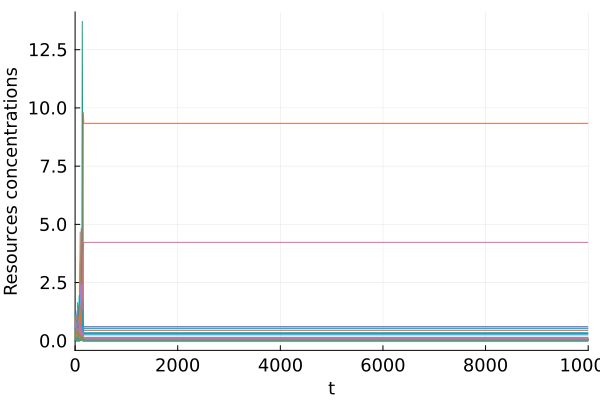

In [75]:
plot(sol,idxs = Ns+1:Ns+Nr,legend = false,
    ylabel="Resources concentrations",
    xtickfont=font(12),
    ytickfont=font(12),
    guidefont=font(12),
    legendfont=font(12))